# EDA for Charity Data

In [2]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os

%pylab inline

Populating the interactive namespace from numpy and matplotlib


## 0.0 Load Data

In [3]:
project_dir =  os.path.abspath(os.path.join(os.getcwd() ,"../"))
file_name = os.path.join(project_dir,'data','external','charity_data_raw.csv')
all_charity = pd.read_csv(file_name)

## 1.0 Explore data 

In [6]:
all_charity.columns

Index(['ascore', 'category', 'description', 'ein', 'tot_exp', 'admin_exp_p',
       'fund_eff', 'fund_exp_p', 'program_exp_p', 'fscore', 'leader',
       'leader_comp', 'leader_comp_p', 'motto', 'name', 'tot_rev', 'score',
       'state', 'subcategory', 'size', 'program_exp', 'fund_exp', 'admin_exp'],
      dtype='object')

In [7]:
all_charity.dtypes

ascore           float64
category          object
description       object
ein               object
tot_exp          float64
admin_exp_p      float64
fund_eff         float64
fund_exp_p       float64
program_exp_p    float64
fscore           float64
leader            object
leader_comp      float64
leader_comp_p    float64
motto             object
name              object
tot_rev          float64
score            float64
state             object
subcategory       object
size              object
program_exp      float64
fund_exp         float64
admin_exp        float64
dtype: object

In [8]:
all_charity.describe()

,ascore,tot_exp,admin_exp_p,fund_eff,fund_exp_p,program_exp_p,fscore,leader_comp,leader_comp_p,tot_rev,score,program_exp,fund_exp,admin_exp
count,8408.000000,8.408000e+03,8408.000000,8408.000000,8408.000000,8408.000000,8408.000000,7.972000e+03,7972.000000,8.408000e+03,8408.000000,8.408000e+03,8.408000e+03,8.408000e+03
mean,90.724905,1.448428e+07,0.105755,0.108110,0.087736,0.805006,85.946183,1.641593e+05,0.039070,1.582723e+07,86.866904,1.243070e+07,8.929307e+05,1.138578e+06
std,9.771194,6.943732e+07,0.063382,0.087982,0.064882,0.094131,9.755404,1.453191e+05,0.034743,7.557658e+07,8.046299,6.349472e+07,4.355882e+06,4.362716e+06
min,28.000000,5.321300e+04,0.001000,0.010000,0.001000,0.047000,0.000000,0.000000e+00,0.000000,-2.049209e+06,14.480000,3.500383e+04,3.328500e+02,3.348400e+02
25%,89.000000,1.942998e+06,0.063000,0.050000,0.045000,0.757000,81.130000,8.997500e+04,0.015000,2.022281e+06,83.260000,1.509136e+06,1.421605e+05,1.788179e+05
50%,93.000000,3.656226e+06,0.095000,0.090000,0.077000,0.814000,87.460000,1.316330e+05,0.031550,3.951672e+06,88.310000,2.930645e+06,2.935981e+05,3.437180e+05
75%,97.000000,8.859808e+06,0.135000,0.140000,0.115000,0.865000,92.500000,1.977480e+05,0.053900,9.785276e+06,92.020000,7.215094e+06,6.431633e+05,7.745598e+05
max,100.000000,3.142984e+09,0.742000,1.430000,0.916000,0.997000,100.000000,3.691019e+06,0.532300,3.608002e+09,100.000000,2.809828e+09,2.011510e+08,1.574086e+08


In [9]:
all_charity.head()

,ascore,category,description,ein,tot_exp,admin_exp_p,fund_eff,fund_exp_p,program_exp_p,fscore,...,motto,name,tot_rev,score,state,subcategory,size,program_exp,fund_exp,admin_exp
0,100.0,Environment,Working with Oregonians to enhance our quality...,93-0642086,917313.0,0.101,0.18,0.184,0.714,88.61,...,Great communities. Working lands. Iconic Places.,1000 Friends of Oregon,1022513.0,91.94,OR,Environmental Protection and Conservation,small,6.549615e+05,168785.592,92648.613
1,89.0,"Arts, Culture, Humanities",Serving the metropolitan Baltimore area and th...,31-1770828,5053059.0,0.231,0.05,0.032,0.735,82.85,...,88.1 FM -. Your NPR News Station,WYPR,5685761.0,85.59,MD,Public Broadcasting and Media,mid,3.713998e+06,161697.888,1167256.629
2,70.0,Religion,VSS Catholic Communications is dedicated to an...,91-1857425,1891500.0,0.114,0.17,0.197,0.687,86.74,...,Spirit Catholic Radio Network,VSS Catholic Communications,2140836.0,76.80,NE,Religious Media and Broadcasting,small,1.299460e+06,372625.500,215631.000
3,93.0,"Arts, Culture, Humanities",The mission of the Utah Symphony & Opera is to...,51-0145980,22506582.0,0.092,0.08,0.054,0.852,91.03,...,"Engaging, educating, and enriching lives",Utah Symphony & Opera,22203175.0,91.95,UT,Performing Arts,big,1.917561e+07,1215355.428,2070605.544
4,100.0,Human Services,"Funded solely by the footwear industry, Two Te...",22-2579809,5594243.0,0.126,0.12,0.122,0.750,86.23,...,Shoepeople Helping Shoepeople,Two Ten Footwear Foundation,6935506.0,90.26,MA,Social Services,mid,4.195682e+06,682497.646,704874.618


In [10]:
all_charity.isna().sum()

ascore             0
category           0
description        0
ein                0
tot_exp            0
admin_exp_p        0
fund_eff           0
fund_exp_p         0
program_exp_p      0
fscore             0
leader             0
leader_comp      436
leader_comp_p    436
motto             13
name               0
tot_rev            0
score              0
state              0
subcategory        0
size               0
program_exp        0
fund_exp           0
admin_exp          0
dtype: int64

## 1.1 Plot Distributions Over Variables

In [11]:
subcat_count = all_charity.groupby(['subcategory','category'])['ein'].count().reset_index()
cat_count = all_charity.groupby('category')['ein'].count().reset_index()
size_count = all_charity.groupby('size')['ein'].count().reset_index()

### Category

Text(0.5,1,'Distribution over Categories')

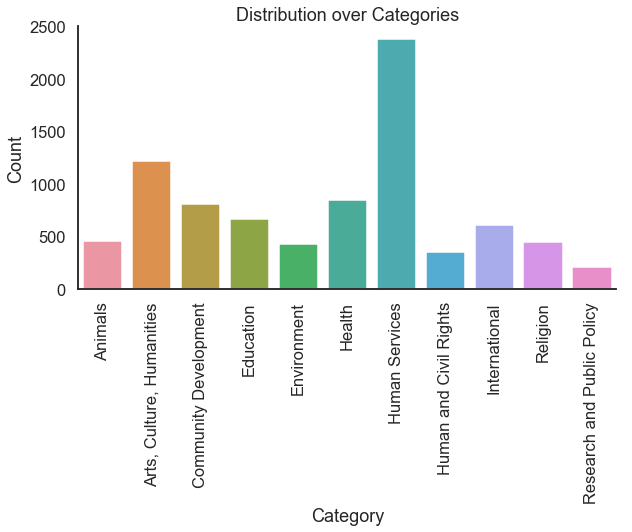

In [12]:
sns.catplot(x = 'category', y = 'ein', kind = 'bar', aspect = 2, data = cat_count)
plt.xticks(rotation=90)
plt.xlabel('Category')
plt.ylabel('Count')
plt.title('Distribution over Categories')

### Sub-Category

In [13]:
len(subcat_count['subcategory'].unique())

37

In [14]:
subcat_count.sort_values(by=['category'])

,subcategory,category,ein
36,Zoos and Aquariums,Animals,67
33,Wildlife Conservation,Animals,89
2,"Animal Rights, Welfare, and Services",Animals,298
24,Public Broadcasting and Media,"Arts, Culture, Humanities",138
23,Performing Arts,"Arts, Culture, Humanities",559
20,Museums,"Arts, Culture, Humanities",390
17,"Libraries, Historical Societies and Landmark P...","Arts, Culture, Humanities",131
32,United Ways,Community Development,393
5,Community Foundations,Community Development,81
16,Jewish Federations,Community Development,84


Text(0.5,1,'Distribution over Subcategories')

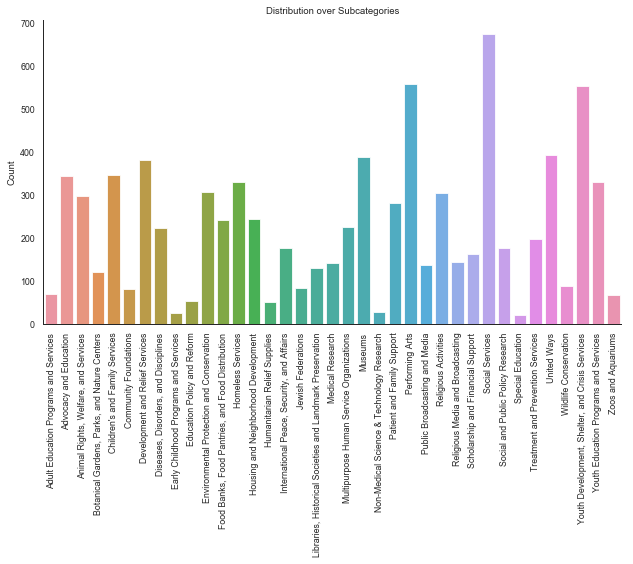

In [26]:
sns.set(rc={'figure.figsize':(30,8)},)
sns.set_style("white")
sns.set_context("paper")
sns.catplot(x = 'subcategory', y = 'ein', kind = 'bar', aspect = 2, data = subcat_count)
plt.xticks(rotation=90)
plt.xlabel('')
plt.ylabel('Count')
plt.title('Distribution over Subcategories')

### Charity Size

Text(0.5,1,'Distribution over Size')

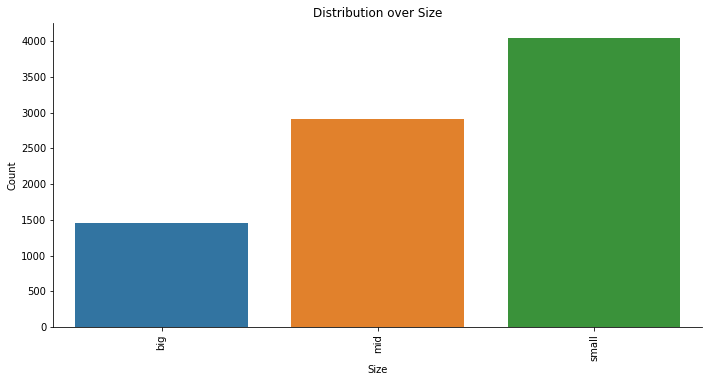

In [12]:
sns.catplot(x = 'size', y = 'ein', kind = 'bar', aspect = 2, data = size_count)
plt.xticks(rotation=90)
plt.xlabel('Size')
plt.ylabel('Count')
plt.title('Distribution over Size')

### Charity Navigator Score

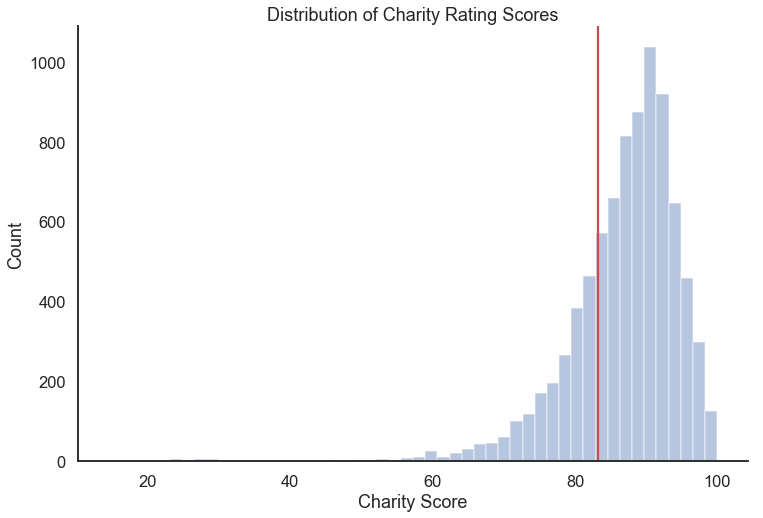

In [44]:
sns.set(rc={'figure.figsize':(12,8)},)
sns.set_style("white")
sns.set_context("talk")
sns.distplot(all_charity['score'],kde = False)
plt.axvline(x = np.percentile(all_charity['score'], 25),color = 'r')
plt.xlabel('Charity Score')
plt.ylabel('Count')
plt.title('Distribution of Charity Rating Scores')
sns.despine()

In [14]:
np.percentile(all_charity['score'], 25)

83.26

### Mission Statement Length

In [28]:
#Create column that counts number of words in article
all_charity['description_length'] = all_charity.apply(lambda x: len(x['description'].split(" ")),axis=1)

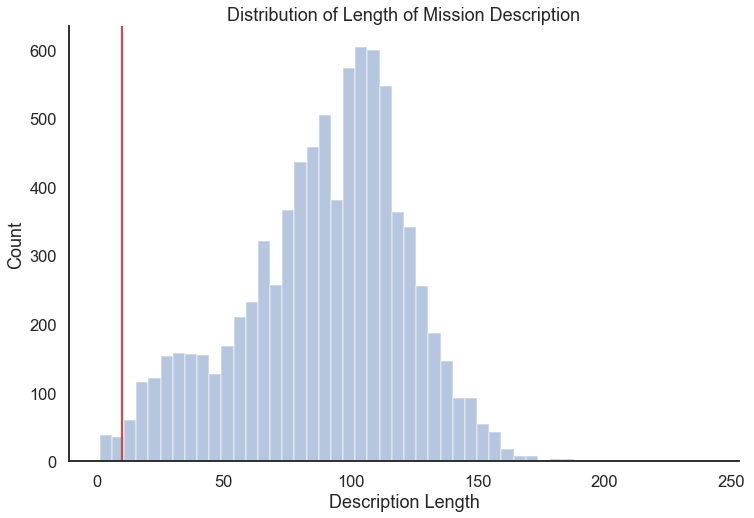

In [40]:
sns.set(rc={'figure.figsize':(12,8)},)
sns.set_style("white")
sns.set_context("talk")
sns.distplot(all_charity['description_length'],kde = False)
plt.axvline(x = 10,color = 'r')
plt.xlabel('Description Length')
plt.ylabel('Count')
plt.title('Distribution of Length of Mission Description')
sns.despine()

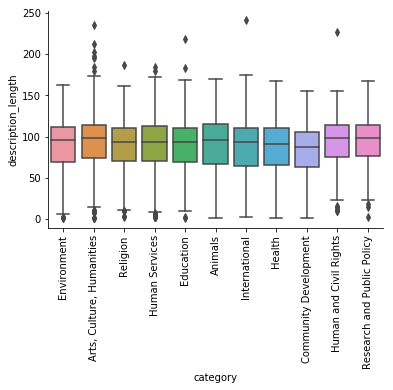

In [17]:
## Description length x category

sns.boxplot(x = 'category', y = 'description_length', data = all_charity)
plt.xticks(rotation=90)
sns.despine()

## 2.0 Filter out Charities 

Filter out charities based on the following qualities
*  Have a charity rating score within the bottom 25% of scores to avoid recommending bad charities
*  Have a mission statement with fewer than 10 words (i.e. not enough signal to create reliable doc embeddings)
*  Are religious organizations or a United Ways (each local united way has its own listing (over 400 unique entries) which overpower the reccommender)

In [19]:
all_charity_use = all_charity[all_charity['score']>np.percentile(all_charity['score'], 25)]
all_charity_use = all_charity_use[all_charity_use['description_length']>10]
all_charity_use = all_charity_use[all_charity_use['category'] != 'Religion']
all_charity_use = all_charity_use[~all_charity_use['subcategory'].isin(['United Ways', 'Jewish Federations'])]

## 3.0 Save Data

In [21]:
all_charity_use.to_csv(os.path.join(project_dir,'data','processed','charity_data_clean.csv')